In [10]:
# QUESTION - 1

# A) Split the given RGB image into 3 different grayscale images, and save the outputs in “tif” format. (5 points)

import cv2
from matplotlib import pyplot as plt

# Reading original image
img=cv2.imread("Sarikamis.jpg")

# Splitting as RGB
Blue=img[:,:,0] 
Green=img[:,:,1]
Red=img[:,:,2]

# Showing Channels as RGB and original img
cv2.imshow('Original Image',img)
cv2.imshow('Blue Channel',Blue)
cv2.imshow('Green Channel',Green)
cv2.imshow('Red Channel',Red)
# Saving Channels as .tif
cv2.imwrite("New_Blue_Image.tif", Blue)
cv2.imwrite("New_Red_Image.tif", Green)
cv2.imwrite("New_Green_Image.tif", Red)
cv2.waitKey(0)
cv2.destroyAllWindows()

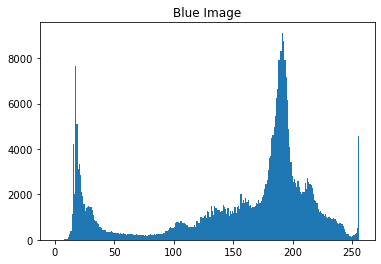

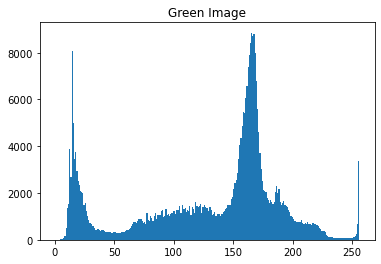

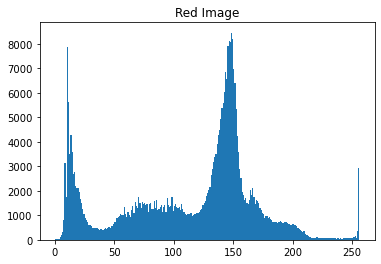

In [11]:
# B) Create histogram of each grayscale image created in (a). (5 points)

# Reading images
Blue_Image = cv2.imread('New_Blue_Image.tif',0)
Green_Image = cv2.imread('New_Red_Image.tif',0) 
Red_Image = cv2.imread('New_Green_Image.tif',0) 

# Finding histograms of all grayscale images in the 0-255 band
# Blue image histogram
plt.hist(Blue_Image.ravel(),256,[0,256])
plt.title('Blue Image')
plt.show()
# Green image histogram
plt.hist(Green_Image.ravel(),256,[0,256])
plt.title('Green Image')
plt.show()
# Red image histogram
plt.hist(Red_Image.ravel(),256,[0,256])
plt.title('Red Image')
plt.show()

In [12]:
# C) Create a new RGB image by adding 60 to all grayscale images created in (a). (5 points) 
# (must be done without a python library)

# Creating a new RGB by adding 60
(h, w) = Blue.shape

for i in range(h):
    for j in range(w):
        Blue[i,j]=Blue[i,j]+60

for i in range(h):
    for j in range(w):
        Red[i,j]=Red[i,j]+60

for i in range(h):
    for j in range(w):
        Green[i,j]=Green[i,j]

# Showing Channels as RGB
cv2.imshow('New_Green_Channel',Green)
cv2.imshow('New_Blue_Channel',Blue)
cv2.imshow('New_Red_Channel',Red)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# D) With the help of one the grayscale images created in (a), design and develop an algorithm (using a python code) that 
# automatically counts total number of pixels covered by the pine trees.(25 points)(must be done without a python library)
import cv2
import numpy as np

print(Green.shape)
(h,w)=Green.shape

# A threshold range has been set
for i in range(h):
    for j in range(w):
        if Green[i,j]>50:
            Green[i,j]=255
        else:
            Green[i,j]=0
# An algorithm that counts total pixels
num = 0
for i in range(h):
    for j in range(w):
        if Green[i,j] == 0:
            num = (num +1)
            continue

print(f'the total number of pixels covered by the pine trees: {round(num)}')
cv2.imshow('Dark Trees',Green)
cv2.waitKey(0)
cv2.destroyAllWindows()

(523, 698)
the total number of pixels covered by the pine trees: 59881


In [14]:
# QUESTION - 2
# You are given a screenshot image of a highway scene (image1.png). Besides, an image without any foreground objects 
# is given (image0.png). Design and develop an algorithm (using a python code) that automatically counts the total number 
# of cars in the given highway screenshot image. (30 points) (must be done without a python library)

import cv2
import numpy as np

# Reading images
img1=cv2.imread("image1.png")
img0=cv2.imread("image0.png")

# Assigned to the same bands
image1=img1[:,:,0]
image0=img0[:,:,0]

# Print the car image and create a zero matrix
print(image1.shape)
(h,w)=image1.shape
empty_img=np.zeros((h,w))

# Get the difference of pixel values and determine the change
for i in range(h):
    for j in range(w):
        empty_img[i,j]=int(image0[i,j])-int(image1[i,j]) 
        if empty_img[i,j]<150 and empty_img[i,j]>40:
            empty_img[i,j]=255                           

        else:
            empty_img[i,j]=0

# Finding the number of cars
number = 0
for i in range(h):
    for j in range(w):
        if empty_img[i,j] == 255:
            number = (number +1)
            continue
print(f'the total number of cars: {round(number/400)}')

# Showing Channels as Threshold and original img
cv2.imshow('threshold_image1',empty_img)
cv2.imshow("image1",image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(240, 320)
the total number of cars: 5


In [15]:
# QUESTION - 3    ((FIRST WAY)) - Median Filter
# Find at least two different ways to digitally improve the quality of this picture with a Python code 
# (30 points). (must be done without a python library)

import cv2
import numpy as np
  
# Reading image
img = cv2.imread('Portrait_of_a_Young_Woman.jpg', 0)
 
# Set the number of rows and columns
h, w = img.shape
  
# hover image pixels by creating matrix and find median value
new_median_image = np.zeros([h, w])
for i in range(1,h-1):
    for j in range(1,w-1):
        pix = [img[i-1, j-1],
               img[i-1, j],
               img[i-1, j + 1],
               img[i, j-1],
               img[i, j],
               img[i, j + 1],
               img[i + 1, j-1],
               img[i + 1, j],
               img[i + 1, j + 1]]

        pix = sorted(pix)
        new_median_image[i, j]= pix[4]      
new_median_image= new_median_image.astype(np.uint8)

# Showing Channels as Median Filter and original img
cv2.imshow('Original Image',img)
cv2.imshow('Median Filter',new_median_image)
cv2.imwrite('new_median_filtered.jpg', new_median_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# QUESTION - 3   ((SECOND WAY)) - Mean Filter
# Find at least two different ways to digitally improve the quality of this picture with a Python code 
# (30 points). (must be done without a python library)

import cv2
import numpy as np
   
# Reading image
img = cv2.imread('Portrait_of_a_Young_Woman.jpg', 0)
 
# Set the number of rows and columns
h, w = img.shape
  
# Creating a unique 3x3 matrix
uniq = np.ones([3, 3], dtype = int)
# Multiply the unit matrix by 1/9
uniq = uniq / 9
  
# Convolve the 3X3 mask over the image
mean_img = np.zeros([h, w])
 
for i in range(1, h-1):
    for j in range(1, w-1):
        pix = img[i-1, j-1]*uniq[0, 0]+img[i-1, j]*uniq[0, 1]+img[i-1, j + 1]*uniq[0, 2]+img[i, j-1]*uniq[1, 0]+ img[i, j]*uniq[1, 1]+img[i, j + 1]*uniq[1, 2]+img[i + 1, j-1]*uniq[2, 0]+img[i + 1, j]*uniq[2, 1]+img[i + 1, j + 1]*uniq[2, 2]
        
        mean_img[i, j]= pix
         
mean_img = mean_img.astype(np.uint8)
cv2.imshow('original image',img)
cv2.imshow('mean filter',mean_img)
cv2.imwrite('new_mean_filter.jpg', mean_img)
cv2.waitKey(0)
cv2.destroyAllWindows()